In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt 
import sys
import torch
import torch.optim as optim
import torch.nn as nn
from dip import EncDec
from utils import imread

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling1D, Conv2DTranspose, MaxPool1D, Dropout, Conv1D, Conv2D, Conv3D, Flatten, MaxPool2D, AveragePooling2D, BatchNormalization


In [2]:
im = imread('../data/denoising/lena.png')
noise1 = imread('../data/denoising/lena-noisy.png')
error1 = ((im - noise1)**2).sum()
print ('Noisy image SE: {:.2f}'.format(error1))

Noisy image SE: 338.54


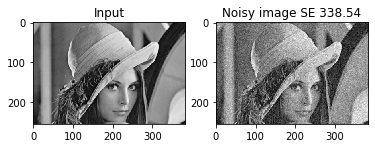

In [3]:
plt.figure(1)

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('Input')

plt.subplot(122)
plt.imshow(noise1, cmap='gray')
plt.title('Noisy image SE {:.2f}'.format(error1))

plt.show(block=False)

In [10]:
class EncDec1(nn.Module):

    def __init__(self):
        super(EncDec1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 1
        self.bn1 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 3
        self.bn3 = nn.BatchNorm2d(64)
        
        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1) # Decoder - 1
        self.bn4 = nn.BatchNorm2d(64)
        
        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv5 = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 2 
        self.bn5 = nn.BatchNorm2d(32)
        
        self.upsample3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv6 = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 3
        self.bn6 = nn.BatchNorm2d(16)
        
        self.conv7 = nn.Conv2d(16, 1, 3, 1, 1) # Channe-1
        
    def forward(self, x):
        out = self.bn1(F.relu(self.conv1(x)))
        out = self.bn2(F.relu(self.conv2(out)))
        out = self.bn3(F.relu(self.conv3(out)))
        
        out = self.bn4(F.relu(self.conv4(self.upsample1(out))))
        out = self.bn5(F.relu(self.conv5(self.upsample2(out))))
        out = self.bn6(F.relu(self.conv6(self.upsample3(out))))
        out = F.relu(self.conv7(out))
        return out

In [12]:
MAX_EPOCHS = 500

net = EncDec1()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

for itr in range(MAX_EPOCHS):

    # zero the parameter gradients
    optimizer.zero_grad()
    eta = torch.randn(*noisy_img.size())

    # Forward + Backward + Optimize 
    loss = criterion(net(eta), clean_img)
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        print ("Loss = {}".format(loss.detach().numpy().reshape(-1)[0]))

/home/ec2-user/anaconda3/envs/cs682/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Loss = 0.29761916399002075
Loss = 0.11656680703163147
Loss = 0.09341274946928024
Loss = 0.07376714050769806
Loss = 0.041701022535562515


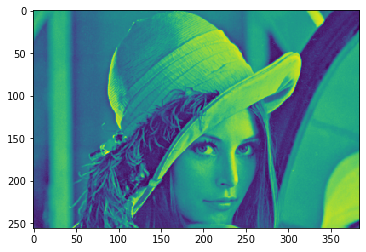

In [16]:
plt.imshow(im)

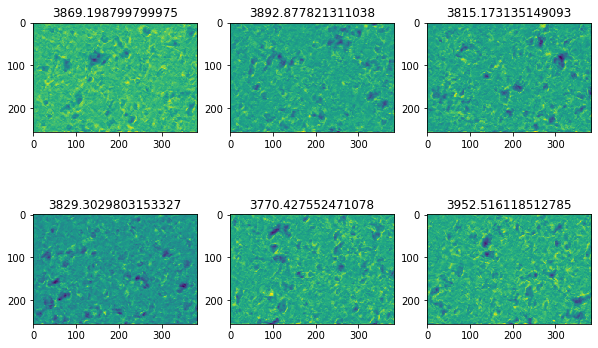

In [17]:
plt.figure(figsize=(10, 10))
for i in range(6):
    #net = EncDec()
    noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
    #clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)
    # Creates \eta (noisy input)
    eta = torch.randn(*noisy_img.size())
    out = net(eta)
    out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
    error2 = ((im - out_img)**2).sum()

    plt.subplot(3, 3, (i+1))
    plt.title (error2)
    
    plt.imshow(out_img)

In [18]:
out_img.shape

(256, 384)

In [19]:
class EncDec2(nn.Module):

    def __init__(self):
        super(EncDec2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 1
        self.bn1 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 3
        self.bn3 = nn.BatchNorm2d(64)
        
        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1) # Decoder - 1
        self.bn4 = nn.BatchNorm2d(64)
        
        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv5 = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 2 
        self.bn5 = nn.BatchNorm2d(32)
        
        self.upsample3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.conv6 = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 3
        self.bn6 = nn.BatchNorm2d(16)
        
        self.conv7 = nn.Conv2d(16, 1, 3, 1, 1) # Channe-1
        
    def forward(self, x):
        out = self.bn1(F.relu(self.conv1(x)))
        out = self.bn2(F.relu(self.conv2(out)))
        out = self.bn3(F.relu(self.conv3(out)))
        
        out = self.upsample1(self.bn4(F.relu(self.conv4(out))))
        out = self.upsample2(self.bn5(F.relu(self.conv5(out))))
        out = self.upsample3(self.bn6(F.relu(self.conv6(out))))
        out = F.relu(self.conv7(out))
        return out

In [20]:
MAX_EPOCHS = 500

net = EncDec2()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)

for itr in range(MAX_EPOCHS):

    # zero the parameter gradients
    optimizer.zero_grad()
    eta = torch.randn(*noisy_img.size())

    # Forward + Backward + Optimize 
    loss = criterion(net(eta), clean_img)
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        print ("Loss = {}".format(loss.detach().numpy().reshape(-1)[0]))

Loss = 0.23249956965446472
Loss = 0.11773255467414856
Loss = 0.09044072777032852
Loss = 0.0438755564391613
Loss = 0.04058143496513367


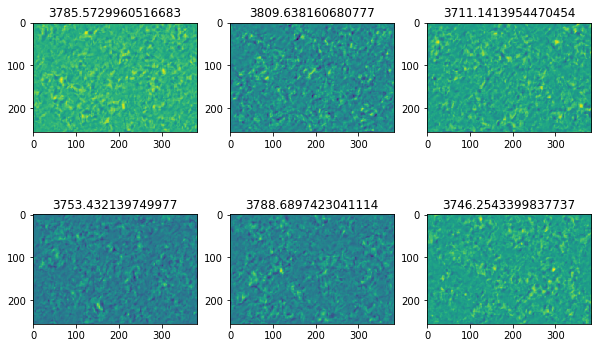

In [21]:
plt.figure(figsize=(10, 10))
for i in range(6):
    #net = EncDec()
    noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
    #clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)
    # Creates \eta (noisy input)
    eta = torch.randn(*noisy_img.size())
    out = net(eta)
    out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
    error2 = ((im - out_img)**2).sum()

    plt.subplot(3, 3, (i+1))
    plt.title (error2)
    
    plt.imshow(out_img)